In [12]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/mineral-knn-imputer/Mineral_KNN_imputer.xlsx
/kaggle/input/mineral1/Mineral contents-updated.xlsx


In [13]:
# Blocking the future warnings
import warnings
warnings.filterwarnings(action = 'ignore')

PCA Size Reduction Analysis
PCA is designed for size conversion. In other words, it reduces the size of the data set and allows us to look at it from a different angle. In this way, analysis can be done on less data. PCA is also used for dimension aggregation and getting rid of redundant parts of data dimensions. This will enable us to process the data more easily in line with these operations and to see its dimensions more easily. It will make the work of those operating in the field of distance measurement visibly easier. In addition to the plus features mentioned above, this method also causes data loss. To prevent this, a close reduction in the size can be made. PCA treats the dataset as a complete dataset. Thanks to unsupervised learning, it does not classify the data, only performs the most appropriate size conversion.



Usage areas of PCA method: ✈

Noise Filtering

Data Visualization

Attribute Elimination/Conversion

Attribute Extraction

Stock Market Analysis

Health Data

# Import

In [14]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn import preprocessing
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.decomposition import PCA
from sklearn.impute import SimpleImputer
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/mineral-knn-imputer/Mineral_KNN_imputer.xlsx
/kaggle/input/mineral1/Mineral contents-updated.xlsx


In [15]:
# pd.set_option("display.max_columns", None)
# pd.set_option("display.width",500)

In [16]:
# !pip install openpyxl

In [17]:
xls = pd.ExcelFile("/kaggle/input/mineral-knn-imputer/Mineral_KNN_imputer.xlsx")
print(xls.sheet_names)
df = xls.parse(xls.sheet_names[0])  # or replace with the correct sheet name

['Sheet1']


In [ ]:
/kaggle/input/mineral1

In [20]:
df = pd.read_excel("/kaggle/input/mineral1/Mineral contents-updated.xlsx", sheet_name='Sheet1')
df.head()

,SAMPLE ID,SAMPLE TYPE,REFERENCES,Source,Plagioclase,Olivine,Augite,Orthopyroxene,Pigeonite,ilmenite,...,Norite,Forsterite,Nepheline,Analcime,Basalt.1,Sum crystal componeents,Amorphous Glass,Glass Rich Basalt,Others,crys vs amorph ratio
0,10084,Apollo 11,LINK,Mare(Sea of Tranquilities),18.8,0.3,22.6,0.0,9.2,12.0,...,NaN,NaN,NaN,NaN,NaN,64.2,35.9,NaN,NaN,1.788301
1,12001,Apollo 12,NaN,Oceanus Procellarum,19.3,6.6,15.0,0.0,19.9,4.5,...,NaN,NaN,NaN,NaN,NaN,68.4,31.6,NaN,NaN,2.164557
2,12023,NaN,NaN,NaN,19.3,7.1,10.2,0.0,20.5,2.9,...,NaN,NaN,NaN,NaN,NaN,66.8,33.2,NaN,NaN,2.012048
3,12024,NaN,NaN,NaN,23.0,6.8,10.5,2.5,19.6,3.7,...,NaN,NaN,NaN,NaN,NaN,71.9,28.2,NaN,NaN,2.549645
4,12030,NaN,NaN,NaN,20.7,5.0,18.2,5.1,19.9,4.5,...,NaN,NaN,NaN,NaN,NaN,77.6,22.3,NaN,NaN,3.479821


In [21]:
df.shape

(153, 36)

In [22]:
df.describe()

,Plagioclase,Olivine,Augite,Orthopyroxene,Pigeonite,ilmenite,chromite,quartz,cristobalite,Phosphate,...,Orthoclase,Norite,Forsterite,Nepheline,Analcime,Basalt.1,Sum crystal componeents,Amorphous Glass,Glass Rich Basalt,Others
count,141.000000,136.000000,121.000000,115.000000,115.000000,135.000000,79.000000,82.000000,79.000000,4.000000,...,11.000000,1.00,4.000000,1.0,1.0,1.0,149.000000,130.000000,2.00000,6.000000
mean,41.332837,6.141691,9.037190,2.418261,10.103478,3.255037,0.883544,2.617927,0.637975,0.725000,...,1.338182,19.86,6.225000,8.3,1.6,3.0,72.875503,30.064000,28.35000,11.588333
std,22.135713,3.635845,7.333055,2.235581,5.037037,3.559604,0.762995,13.650534,0.349837,0.531507,...,2.126753,NaN,1.717314,NaN,NaN,NaN,13.290711,10.166653,5.16188,12.793496
min,11.600000,0.000000,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.100000,...,0.060000,19.86,4.000000,8.3,1.6,3.0,43.340000,0.000000,24.70000,2.500000
25%,21.500000,4.100000,3.900000,0.000000,6.500000,0.200000,0.400000,0.300000,0.400000,0.550000,...,0.275000,19.86,5.500000,8.3,1.6,3.0,63.800000,25.075000,26.52500,2.575000
50%,32.900000,6.000000,7.300000,2.200000,9.100000,2.300000,0.800000,0.450000,0.600000,0.700000,...,0.510000,19.86,6.400000,8.3,1.6,3.0,69.600000,31.400000,28.35000,4.255000
75%,54.300000,7.895000,13.600000,4.400000,12.300000,4.550000,1.150000,0.700000,0.800000,0.875000,...,1.050000,19.86,7.125000,8.3,1.6,3.0,79.200000,37.150000,30.17500,21.677500
max,100.000000,19.060000,35.000000,7.800000,25.400000,14.000000,3.200000,100.000000,1.600000,1.400000,...,7.240000,19.86,8.100000,8.3,1.6,3.0,107.470000,54.500000,32.00000,29.020000


In [23]:
print(df.info())
df.shape

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 153 entries, 0 to 152
Data columns (total 36 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   SAMPLE ID                151 non-null    object 
 1   SAMPLE TYPE              32 non-null     object 
 2   REFERENCES               8 non-null      object 
 3   Source                   29 non-null     object 
 4   Plagioclase              141 non-null    float64
 5   Olivine                  136 non-null    float64
 6   Augite                   121 non-null    float64
 7   Orthopyroxene            115 non-null    float64
 8   Pigeonite                115 non-null    float64
 9   ilmenite                 135 non-null    float64
 10  chromite                 79 non-null     float64
 11  quartz                   82 non-null     float64
 12  cristobalite             79 non-null     float64
 13  Phosphate                4 non-null      float64
 14  whitlockite              7

(153, 36)

# Data Cleaning 

In [24]:
df_cleaned = df.fillna(0)

In [25]:
dfc=df_cleaned

In [26]:
dfc.iloc[117]

SAMPLE ID                  CE-5 average
SAMPLE TYPE                   chang E 5
REFERENCES                            0
Source                                0
Plagioclase                        30.1
Olivine                             5.7
Augite                             30.9
Orthopyroxene                       0.0
Pigeonite                          11.1
ilmenite                            4.5
chromite                            0.0
quartz                              0.4
cristobalite                        0.0
Phosphate                           0.7
whitlockite                         0.0
Pyroxene                            0.0
Silica                              0.0
Anorthite                           0.0
Anorthosite                         0.0
Apatite                             0.0
Basalt                              0.0
Diopside                            0.0
Feldspar                            0.0
Hypersthene                         0.0
Magnetite                           0.0


In [27]:
dfc.insert(0, 'Sample Origin', ['L'] * 117 + ['E'] * (df.shape[0] - 117))
dfc.head()

,Sample Origin,SAMPLE ID,SAMPLE TYPE,REFERENCES,Source,Plagioclase,Olivine,Augite,Orthopyroxene,Pigeonite,...,Norite,Forsterite,Nepheline,Analcime,Basalt.1,Sum crystal componeents,Amorphous Glass,Glass Rich Basalt,Others,crys vs amorph ratio
0,L,10084,Apollo 11,LINK,Mare(Sea of Tranquilities),18.8,0.3,22.6,0.0,9.2,...,0.0,0.0,0.0,0.0,0.0,64.2,35.9,0.0,0.0,1.788301
1,L,12001,Apollo 12,0,Oceanus Procellarum,19.3,6.6,15.0,0.0,19.9,...,0.0,0.0,0.0,0.0,0.0,68.4,31.6,0.0,0.0,2.164557
2,L,12023,0,0,0,19.3,7.1,10.2,0.0,20.5,...,0.0,0.0,0.0,0.0,0.0,66.8,33.2,0.0,0.0,2.012048
3,L,12024,0,0,0,23.0,6.8,10.5,2.5,19.6,...,0.0,0.0,0.0,0.0,0.0,71.9,28.2,0.0,0.0,2.549645
4,L,12030,0,0,0,20.7,5.0,18.2,5.1,19.9,...,0.0,0.0,0.0,0.0,0.0,77.6,22.3,0.0,0.0,3.479821


# EDA

In [28]:
# X = dfc.drop(columns=['crys vs amorph ratio'])
# y = dfc['crys vs amorph ratio']
y = dfc['Sample Origin']
X = dfc.drop(columns=['Sample Origin'])  # keep all other columns
# Optional: check
print("X shape:", X.shape)
print("y shape:", y.shape)

X shape: (153, 36)
y shape: (153,)


In [29]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [30]:
numeric_cols = X.select_dtypes(include='number').columns# Step 7: Scale only numeric columns
scaler = StandardScaler()
X_train_scaled = X_train.copy()
X_test_scaled = X_test.copy()

X_train_scaled[numeric_cols] = scaler.fit_transform(X_train[numeric_cols])
X_test_scaled[numeric_cols] = scaler.transform(X_test[numeric_cols])

# Apply PCA to scaled numeric features
pca = PCA(n_components=2)
X_train_pca = pca.fit_transform(X_train_scaled[numeric_cols])
X_test_pca = pca.transform(X_test_scaled[numeric_cols])

# Create DataFrames to keep PCA results + other original info
pca_train_df = pd.DataFrame(X_train_pca, columns=['PC1', 'PC2'], index=X_train.index)
pca_test_df = pd.DataFrame(X_test_pca, columns=['PC1', 'PC2'], index=X_test.index)

X_train_final = pd.concat([X_train.reset_index(drop=True), pca_train_df.reset_index(drop=True)], axis=1)
X_test_final = pd.concat([X_test.reset_index(drop=True), pca_test_df.reset_index(drop=True)], axis=1)

# X_train_final and X_test_final contain original data + PCA columns
X_train_final.head()

,SAMPLE ID,SAMPLE TYPE,REFERENCES,Source,Plagioclase,Olivine,Augite,Orthopyroxene,Pigeonite,ilmenite,...,Nepheline,Analcime,Basalt.1,Sum crystal componeents,Amorphous Glass,Glass Rich Basalt,Others,crys vs amorph ratio,PC1,PC2
0,73221,0,0,0,43.9,9.8,4.6,5.0,8.9,3.1,...,0.0,0.0,0.0,76.4,23.7,0.0,0.0,3.223629,-0.730519,0.007188
1,68501,0,0,0,55.2,5.6,2.2,1.2,5.2,0.4,...,0.0,0.0,0.0,69.8,30.2,0.0,0.0,2.311258,0.803227,-1.018527
2,15071,0,0,0,18.9,0.6,11.1,4.9,20.8,4.4,...,0.0,0.0,0.0,62.5,37.5,0.0,0.0,1.666667,-2.398037,0.977087
3,61241,0,0,0,55.8,6.2,2.2,0.0,6.3,0.0,...,0.0,0.0,0.0,70.5,29.5,0.0,0.0,2.389831,0.914241,-1.070764
4,70321,0,0,0,19.6,0.8,19.8,0.0,15.4,11.2,...,0.0,0.0,0.0,68.9,31.2,0.0,0.0,2.208333,-2.567476,1.385712


In [31]:
import plotly.express as px

# Add Sample Origin labels back (you already have y_train, so reattach)
X_train_final['Sample Origin'] = y_train.reset_index(drop=True).astype(str)

# Plot PCA components with labels
fig = px.scatter(
    X_train_final,
    x='PC1',
    y='PC2',
    color='Sample Origin',
    title='PCA Visualization of Lunar (L) vs Earth (E) Samples',
    color_discrete_sequence=px.colors.qualitative.G10,
    labels={'PC1': 'Principal Component 1', 'PC2': 'Principal Component 2'}
)

fig.show()


In [32]:
numeric_cols = X.select_dtypes(include='number').columns# Step 7: Scale only numeric columns
scaler = StandardScaler()
X_train_scaled = X_train.copy()
X_test_scaled = X_test.copy()

X_train_scaled[numeric_cols] = scaler.fit_transform(X_train[numeric_cols])
X_test_scaled[numeric_cols] = scaler.transform(X_test[numeric_cols])

# Apply PCA to scaled numeric features
pca = PCA(n_components=3)
X_train_pca = pca.fit_transform(X_train_scaled[numeric_cols])
X_test_pca = pca.transform(X_test_scaled[numeric_cols])

# Create DataFrames to keep PCA results + other original info
pca_train_df = pd.DataFrame(X_train_pca, columns=['PC1', 'PC2','PC3'], index=X_train.index)
pca_test_df = pd.DataFrame(X_test_pca, columns=['PC1', 'PC2','PC3'], index=X_test.index)

X_train_final = pd.concat([X_train.reset_index(drop=True), pca_train_df.reset_index(drop=True)], axis=1)
X_test_final = pd.concat([X_test.reset_index(drop=True), pca_test_df.reset_index(drop=True)], axis=1)

# X_train_final and X_test_final contain original data + PCA columns
X_train_final.head()

,SAMPLE ID,SAMPLE TYPE,REFERENCES,Source,Plagioclase,Olivine,Augite,Orthopyroxene,Pigeonite,ilmenite,...,Analcime,Basalt.1,Sum crystal componeents,Amorphous Glass,Glass Rich Basalt,Others,crys vs amorph ratio,PC1,PC2,PC3
0,73221,0,0,0,43.9,9.8,4.6,5.0,8.9,3.1,...,0.0,0.0,76.4,23.7,0.0,0.0,3.223629,-0.730519,0.007188,-0.463570
1,68501,0,0,0,55.2,5.6,2.2,1.2,5.2,0.4,...,0.0,0.0,69.8,30.2,0.0,0.0,2.311258,0.803227,-1.018527,-0.056820
2,15071,0,0,0,18.9,0.6,11.1,4.9,20.8,4.4,...,0.0,0.0,62.5,37.5,0.0,0.0,1.666667,-2.398037,0.977087,0.006748
3,61241,0,0,0,55.8,6.2,2.2,0.0,6.3,0.0,...,0.0,0.0,70.5,29.5,0.0,0.0,2.389831,0.914241,-1.070764,-0.060557
4,70321,0,0,0,19.6,0.8,19.8,0.0,15.4,11.2,...,0.0,0.0,68.9,31.2,0.0,0.0,2.208333,-2.567476,1.385712,0.114782


In [33]:
from sklearn.decomposition import PCA
import plotly.express as px
import pandas as pd

# Step 1: Apply PCA with 3 components
pca_3d = PCA(n_components=3)
X_train_pca_3 = pca_3d.fit_transform(X_train_scaled[numeric_cols])
X_test_pca_3 = pca_3d.transform(X_test_scaled[numeric_cols])

# Step 2: Prepare DataFrame for Plotly
pca_3d_df = pd.DataFrame({
    'PC1': X_train_pca_3[:, 0],
    'PC2': X_train_pca_3[:, 1],
    'PC3': X_train_pca_3[:, 2],
    'Sample Origin': y_train.reset_index(drop=True).astype(str)
})

# Step 3: Create 3D Scatter Plot
fig = px.scatter_3d(
    pca_3d_df,
    x='PC1',
    y='PC2',
    z='PC3',
    color='Sample Origin',
    title='3D PCA: Lunar vs Earth Samples',
    color_discrete_sequence=px.colors.qualitative.G10
)

# Step 4: Layout adjustments
fig.update_layout(
    margin=dict(l=20, r=20, t=20, b=20),
    scene=dict(
        xaxis_title='PC1',
        yaxis_title='PC2',
        zaxis_title='PC3'
    )
)

fig.show()


In [34]:
from sklearn.decomposition import PCA
import numpy as np

# Store results
explained_variances = []
explained_ratios = []
cumulative_variances = []

print("PCA Evaluation from 1 to 10 components:\n")

for n in range(1, 10):
    pca = PCA(n_components=n)
    X_pca = pca.fit_transform(X_train_scaled[numeric_cols])

    ev = pca.explained_variance_
    evr = pca.explained_variance_ratio_
    cum_evr = np.cumsum(evr)

    explained_variances.append(ev)
    explained_ratios.append(evr)
    cumulative_variances.append(cum_evr)

    print(f"\n--- PCA with {n} component(s) ---")
    print("Explained Variance:", ev)
    print("Explained Variance Ratio:", evr)
    print("Cumulative Variance Ratio:", cum_evr)


PCA Evaluation from 1 to 10 components:


--- PCA with 1 component(s) ---
Explained Variance: [5.27911214]
Explained Variance Ratio: [0.16889809]
Cumulative Variance Ratio: [0.16889809]

--- PCA with 2 component(s) ---
Explained Variance: [5.27911214 3.94194487]
Explained Variance Ratio: [0.16889809 0.12611722]
Cumulative Variance Ratio: [0.16889809 0.29501531]

--- PCA with 3 component(s) ---
Explained Variance: [5.27911214 3.94194487 3.51466969]
Explained Variance Ratio: [0.16889809 0.12611722 0.11244713]
Cumulative Variance Ratio: [0.16889809 0.29501531 0.40746244]

--- PCA with 4 component(s) ---
Explained Variance: [5.27911214 3.94194487 3.51466969 2.16344437]
Explained Variance Ratio: [0.16889809 0.12611722 0.11244713 0.06921649]
Cumulative Variance Ratio: [0.16889809 0.29501531 0.40746244 0.47667893]

--- PCA with 5 component(s) ---
Explained Variance: [5.27911214 3.94194487 3.51466969 2.16344437 2.01672494]
Explained Variance Ratio: [0.16889809 0.12611722 0.11244713 0.06921649 

In [35]:
pca_new = PCA(n_components = None)
X_train_trf = pca_new.fit_transform(X_train_scaled[numeric_cols])
X_test_trf = pca_new.transform(X_test_scaled[numeric_cols])

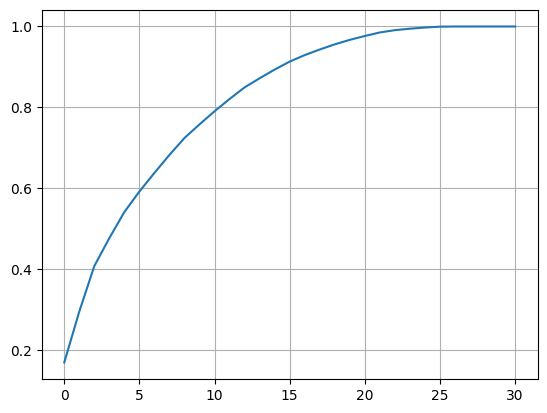

In [36]:
plt.plot(np.cumsum(pca_new.explained_variance_ratio_))
plt.grid()

In [64]:
# Scale numeric columns
numeric_cols = X.select_dtypes(include='number').columns
scaler = StandardScaler()
X_train_scaled = X_train.copy()
X_train_scaled[numeric_cols] = scaler.fit_transform(X_train[numeric_cols])

# Apply PCA with 15 components
pca = PCA(n_components=12)
X_train_pca_15 = pca.fit_transform(X_train_scaled[numeric_cols])

# Step 3: Create separate PCA DataFrame
pca_columns = [f'PC{i+1}' for i in range(12)]
pca_df = pd.DataFrame(X_train_pca_15, columns=pca_columns, index=X_train.index)

# (Optional) Print explained variance info
print("Explained Variance Ratio (each component):")
print(pca.explained_variance_ratio_)
print("\nCumulative Explained Variance:")
print(np.cumsum(pca.explained_variance_ratio_))


Explained Variance Ratio (each component):
[0.16889809 0.12611722 0.11244713 0.06921649 0.0645224  0.0507029
 0.04602203 0.04451101 0.04186388 0.03360737 0.03238718 0.03040325]

Cumulative Explained Variance:
[0.16889809 0.29501531 0.40746244 0.47667893 0.54120133 0.59190423
 0.63792626 0.68243726 0.72430114 0.75790851 0.79029569 0.82069894]


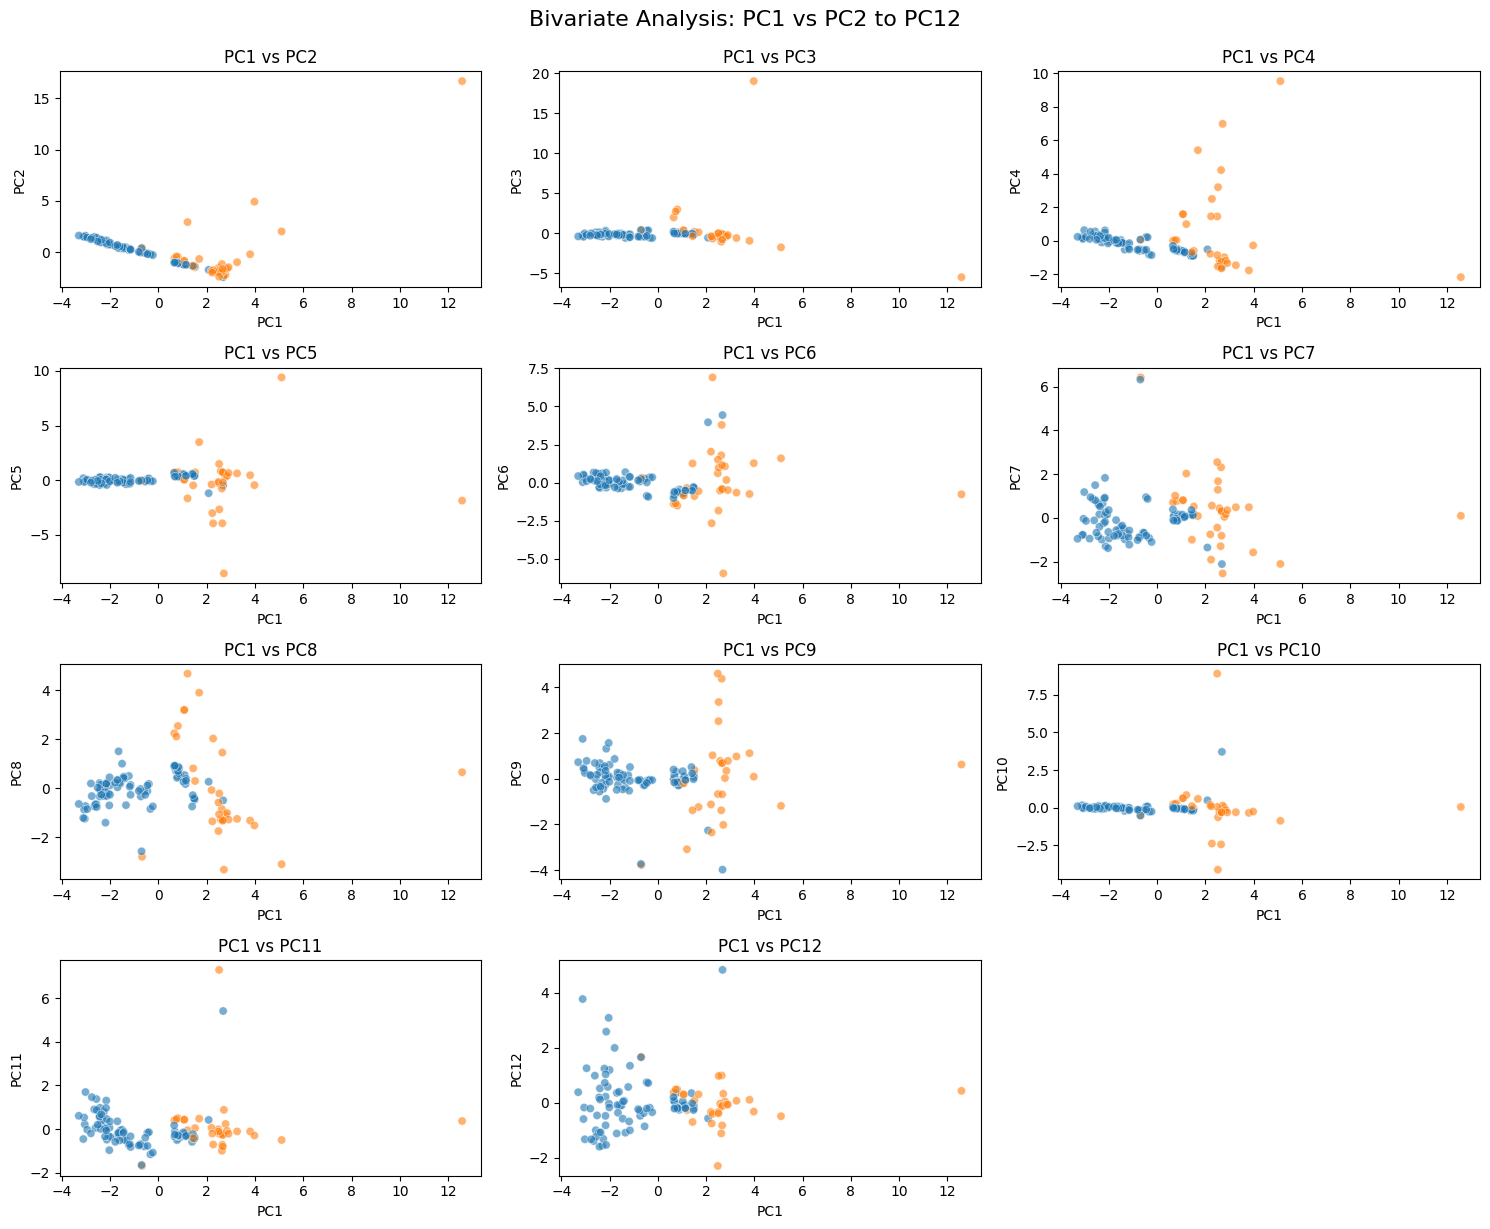

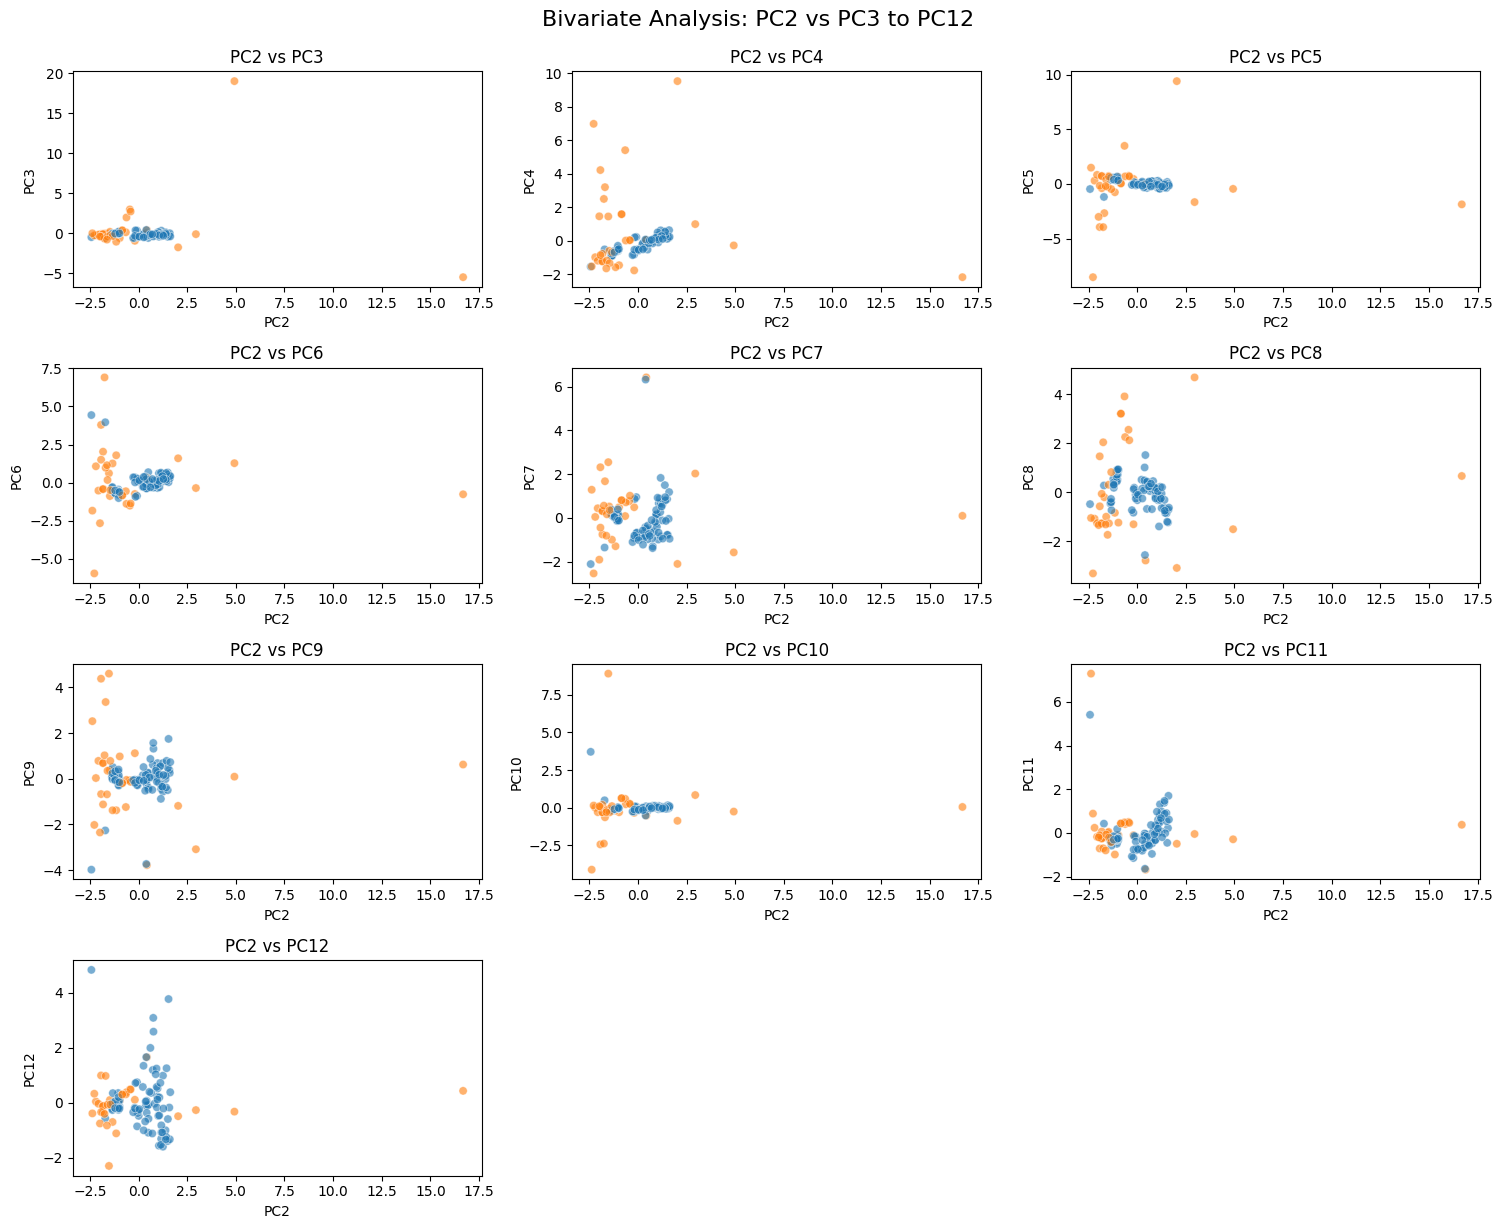

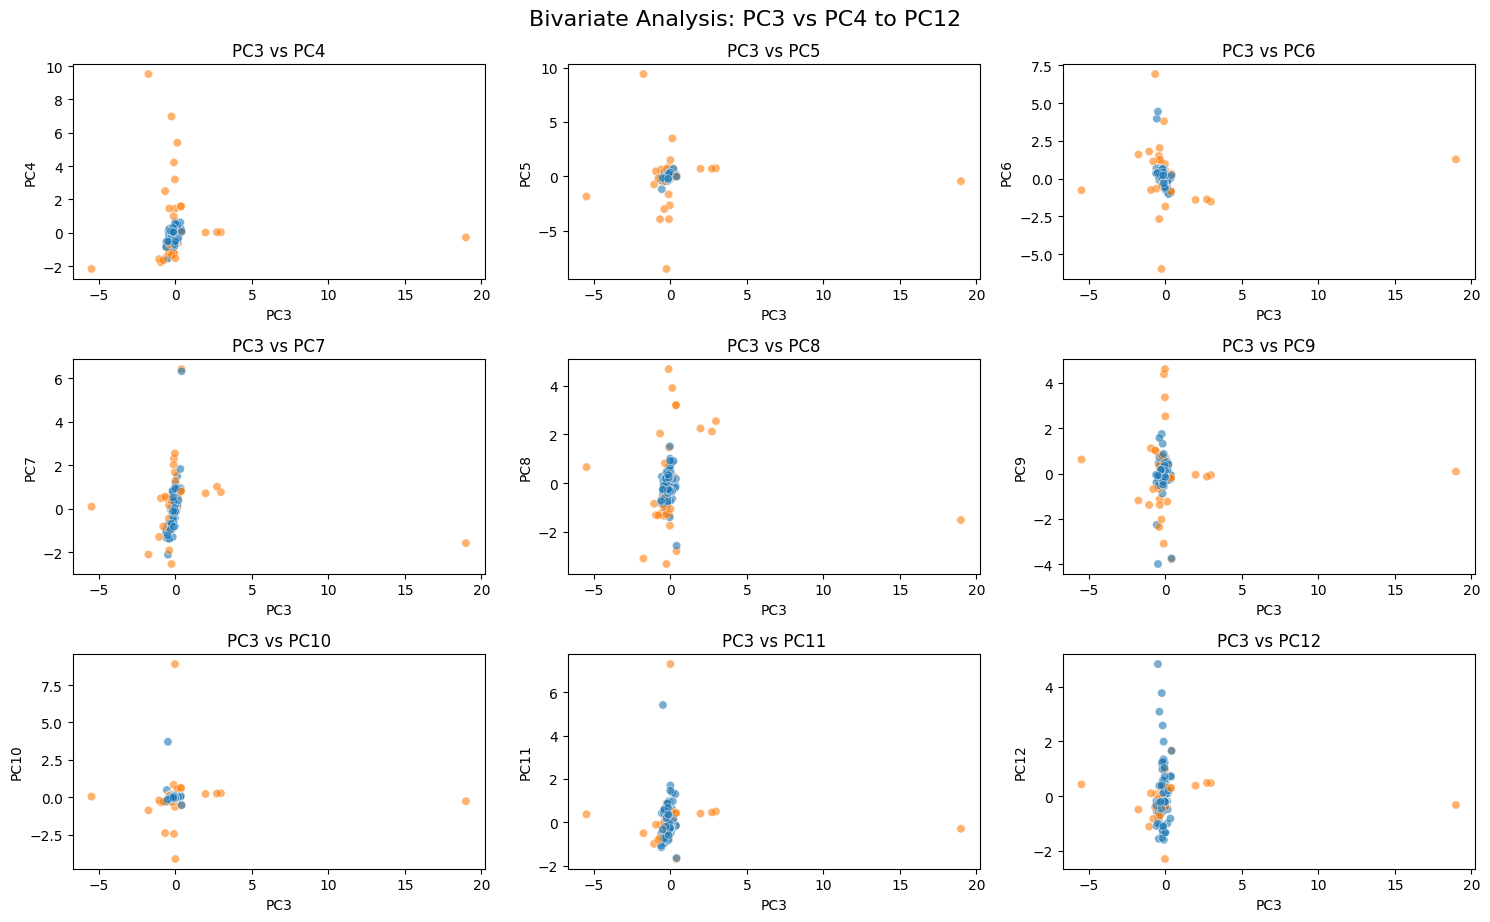

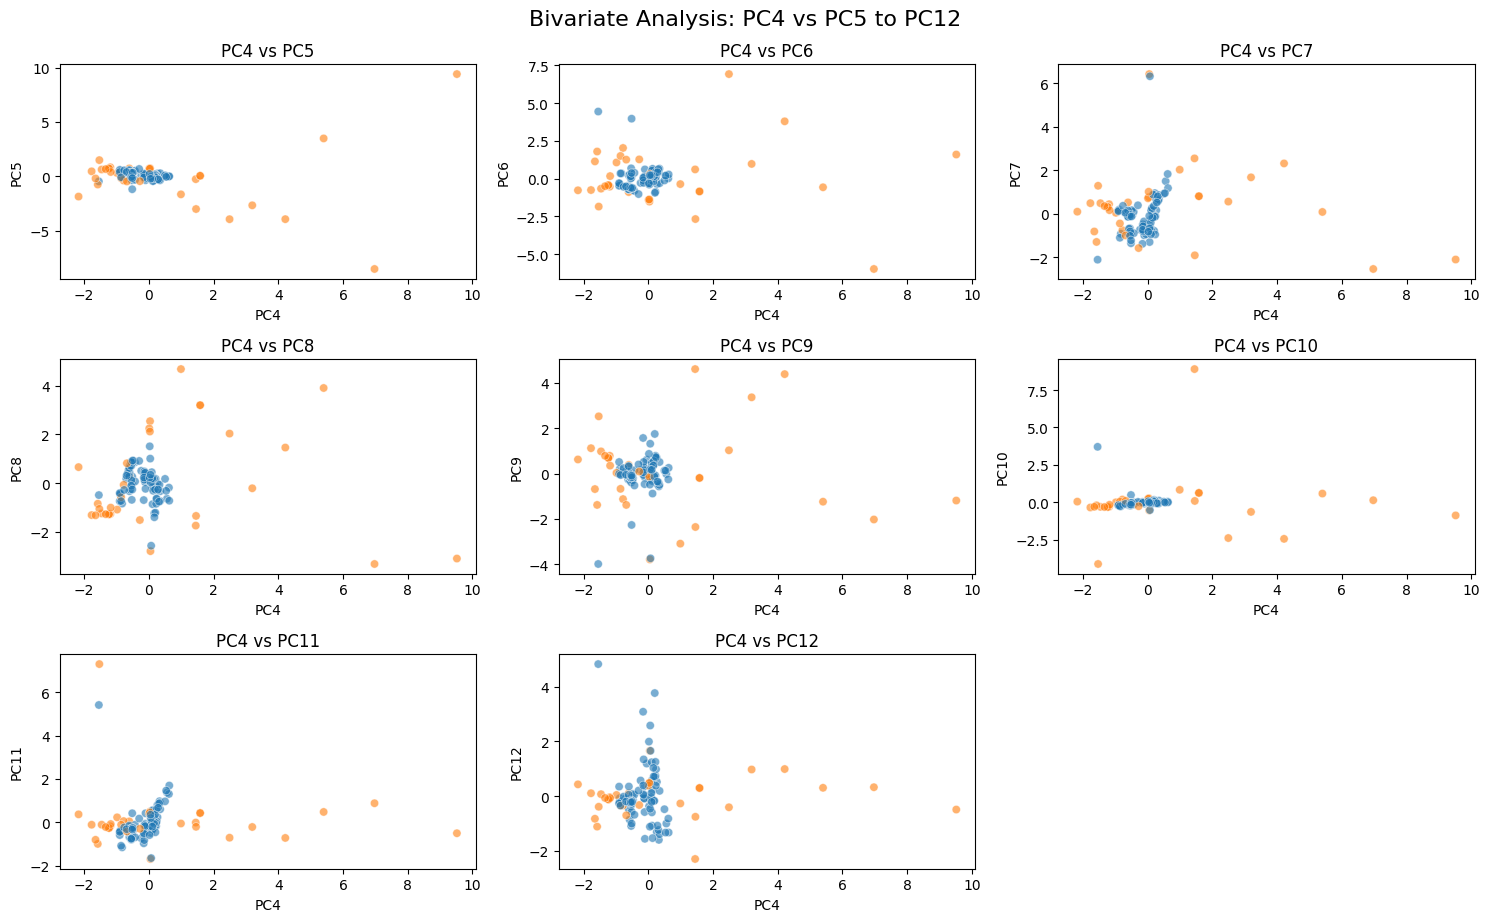

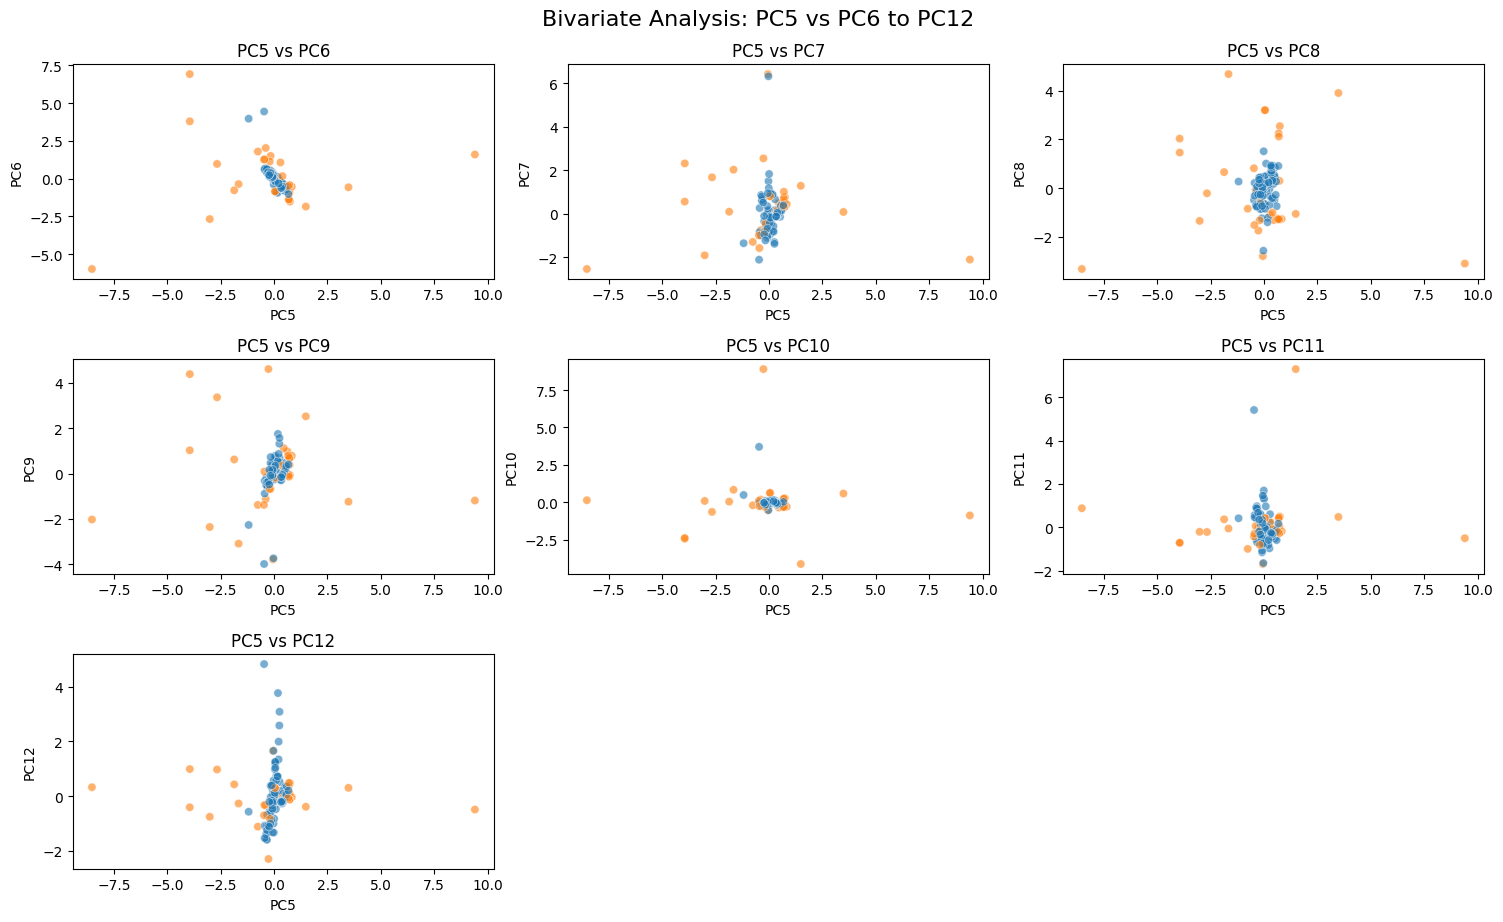

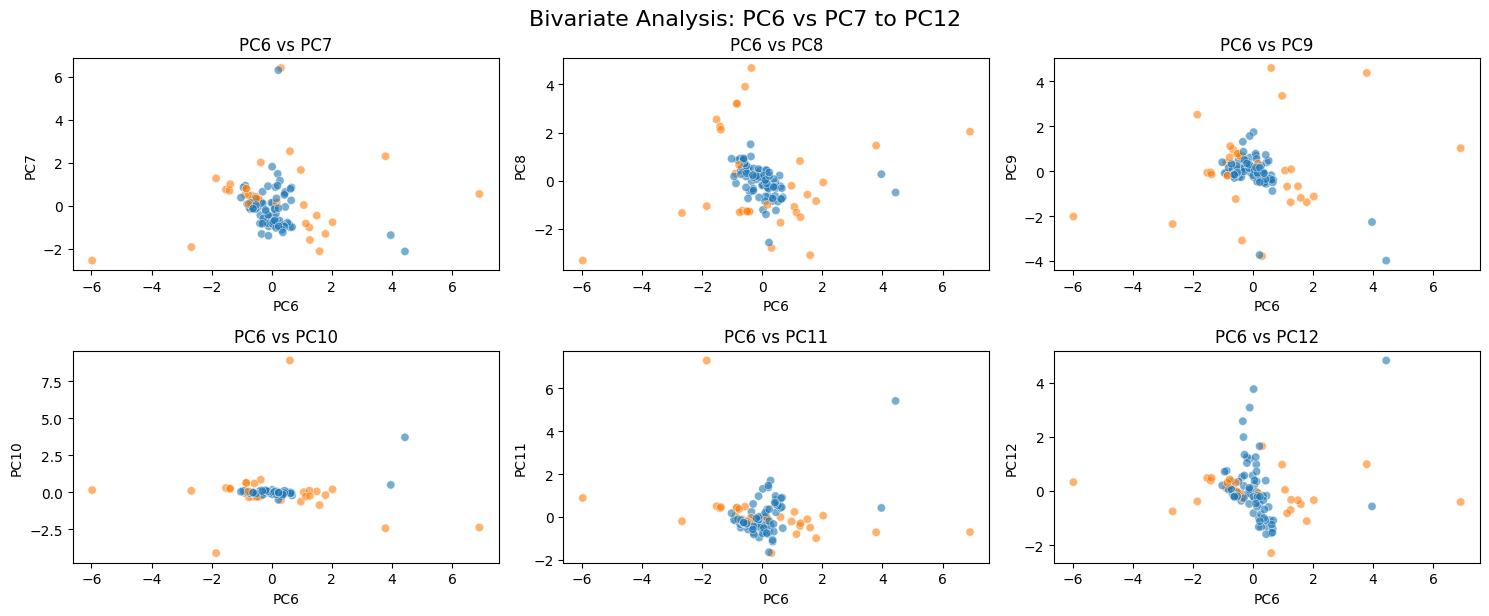

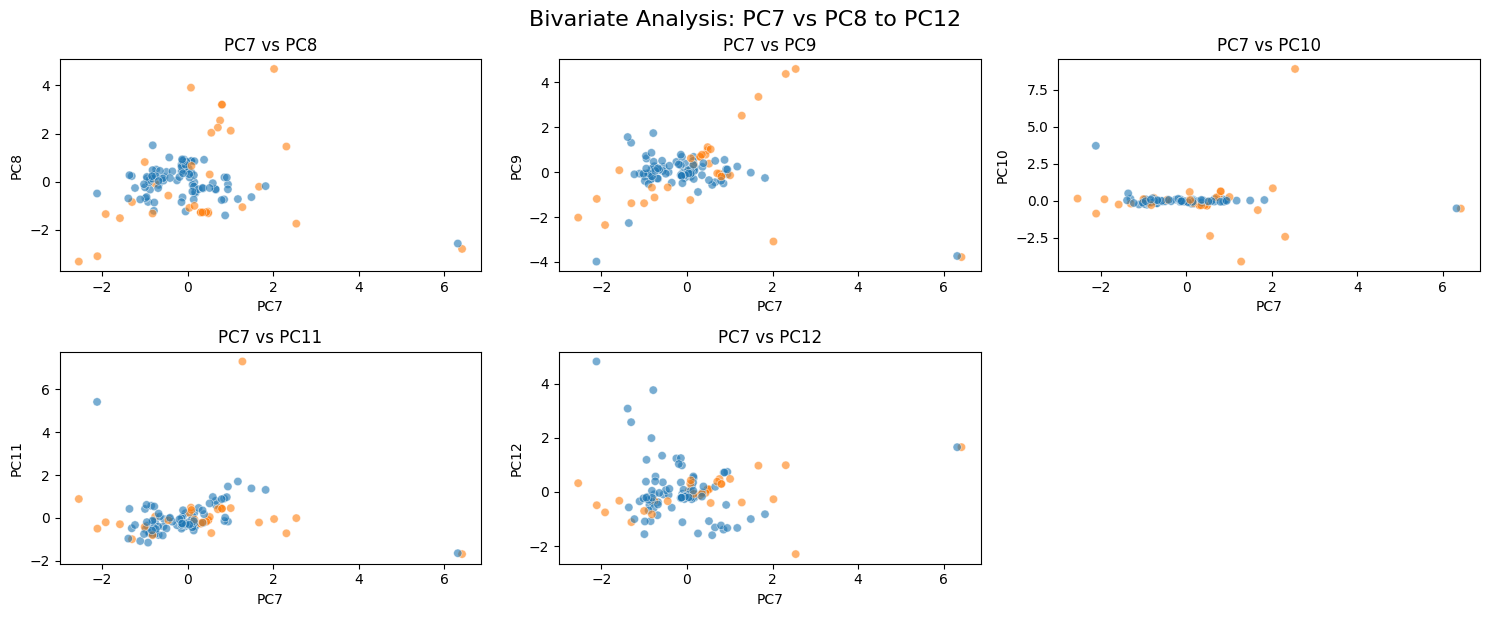

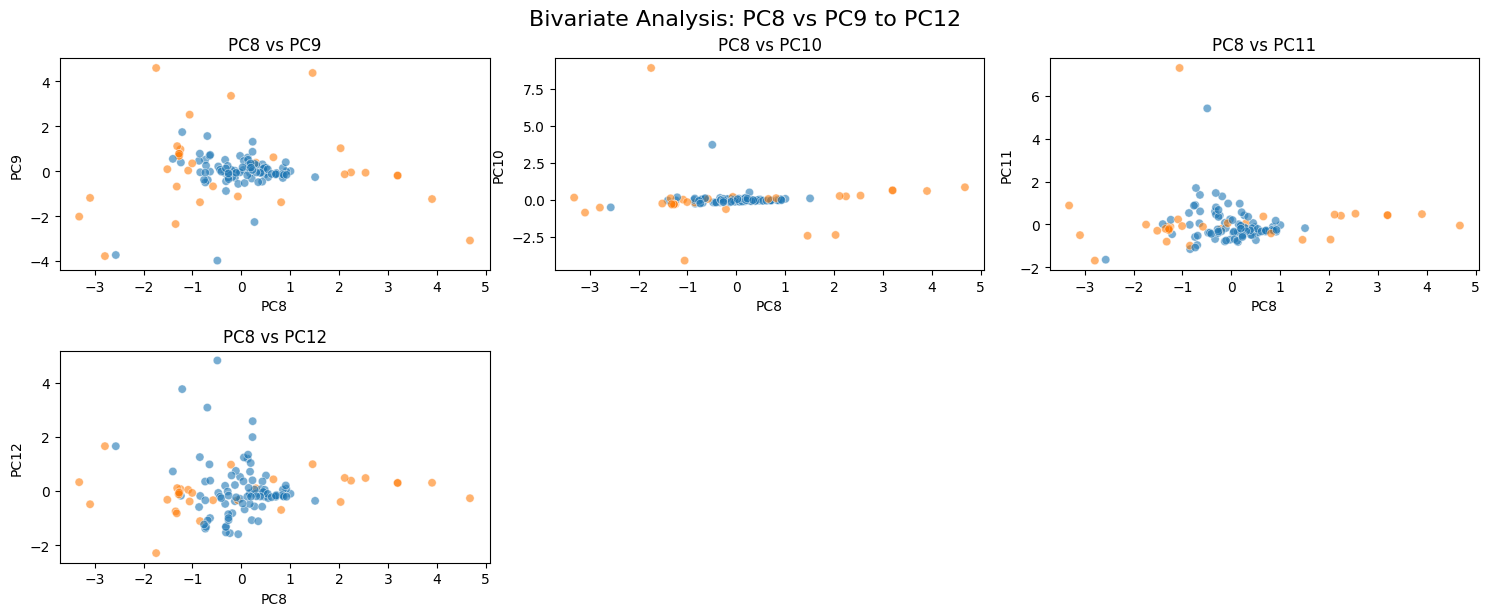

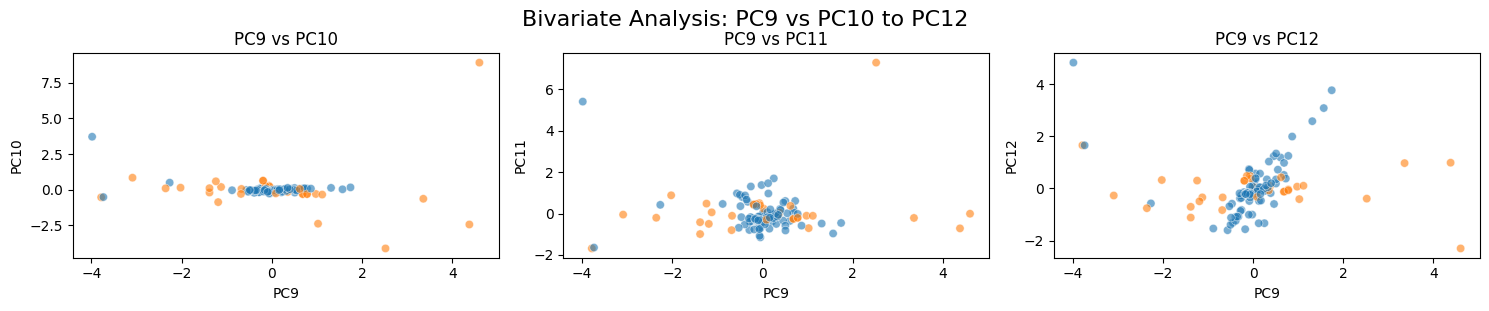

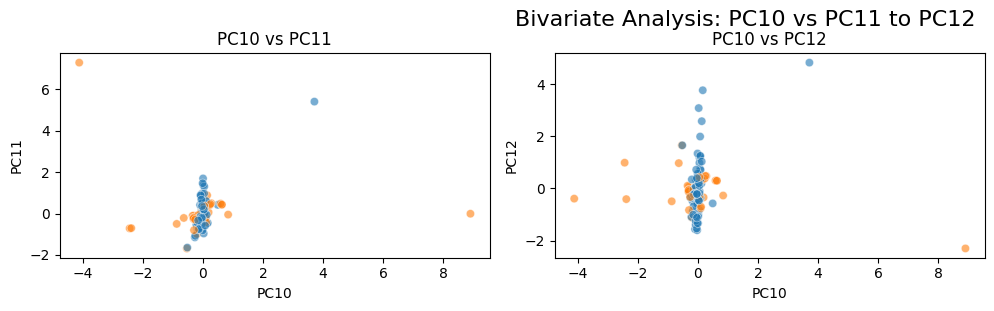

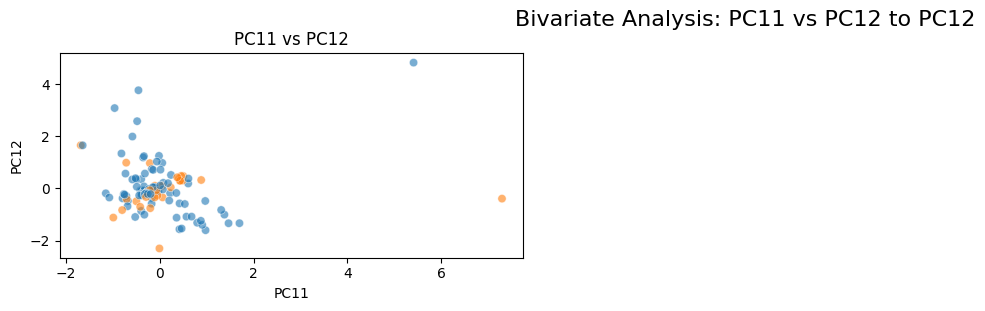

In [65]:
import matplotlib.pyplot as plt
import seaborn as sns

# Make sure `pca_df` and `y_train` are defined
pca_df_with_label = pca_df.copy()
pca_df_with_label['Label'] = y_train.astype(str).values

# Loop over PC1 to PC14, and plot each vs PCi+1 to PC15
for i in range(11):  # i = 0 to 13 → PC1 to PC14
    base_pc = f'PC{i+1}'
    n_plots = 11 - i  # How many subplots per row
    plt.figure(figsize=(5 * 3, 3 * ((n_plots + 2) // 3)))  # dynamic sizing
    
    for j in range(i+1, 12):  # PC(i+2) to PC15
        plt.subplot((n_plots + 2) // 3, 3, j - i)
        compare_pc = f'PC{j+1}'
        sns.scatterplot(
            data=pca_df_with_label,
            x=base_pc, y=compare_pc,
            hue='Label',
            palette='tab10',
            alpha=0.6,
            legend=False
        )
        plt.title(f'{base_pc} vs {compare_pc}')
        plt.tight_layout()

    plt.suptitle(f'Bivariate Analysis: {base_pc} vs PC{i+2} to PC12', fontsize=16, y=1.02)
    plt.show()


In [53]:
X_train

,SAMPLE ID,SAMPLE TYPE,REFERENCES,Source,Plagioclase,Olivine,Augite,Orthopyroxene,Pigeonite,ilmenite,...,Norite,Forsterite,Nepheline,Analcime,Basalt.1,Sum crystal componeents,Amorphous Glass,Glass Rich Basalt,Others,crys vs amorph ratio
94,73221,0,0,0,43.9,9.8,4.6,5.0,8.9,3.1,...,0.0,0.0,0.0,0.0,0.0,76.4,23.7,0.0,0.0,3.223629
68,68501,0,0,0,55.2,5.6,2.2,1.2,5.2,0.4,...,0.0,0.0,0.0,0.0,0.0,69.8,30.2,0.0,0.0,2.311258
22,15071,0,0,0,18.9,0.6,11.1,4.9,20.8,4.4,...,0.0,0.0,0.0,0.0,0.0,62.5,37.5,0.0,0.0,1.666667
45,61241,0,0,0,55.8,6.2,2.2,0.0,6.3,0.0,...,0.0,0.0,0.0,0.0,0.0,70.5,29.5,0.0,0.0,2.389831
76,70321,0,0,0,19.6,0.8,19.8,0.0,15.4,11.2,...,0.0,0.0,0.0,0.0,0.0,68.9,31.2,0.0,0.0,2.208333
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
71,69941,0,0,0,49.8,6.0,0.0,0.0,6.8,0.4,...,0.0,0.0,0.0,0.0,0.0,63.0,36.9,0.0,0.0,1.707317
106,79121,0,0,0,15.6,7.2,9.0,7.8,9.4,7.8,...,0.0,0.0,0.0,0.0,0.0,59.5,40.5,0.0,0.0,1.469136
14,14148,0,0,0,27.9,4.3,8.4,5.8,7.7,4.2,...,0.0,0.0,0.0,0.0,0.0,62.1,38.1,0.0,0.0,1.629921
92,73151,0,0,0,42.3,10.4,4.4,4.2,6.6,2.3,...,0.0,0.0,0.0,0.0,0.0,73.3,26.7,0.0,0.0,2.745318


In [57]:
# sample_id_col = X_train[['Region']]  # Keep as DataFrame
sample_id_col = X_train[['SAMPLE ID']]  # Keep as DataFrame

sample_id_col1 = y_train 
# Extract specific PCs from pca_df
selected_pcs = pca_df[['PC1', 'PC2', 'PC6', 'PC7', 'PC9', 'PC11']]

# Concatenate them into one DataFrame
hello_pca = pd.concat([sample_id_col, selected_pcs, sample_id_col1], axis=1)

# Preview the result
hello_pca.head()

,SAMPLE ID,PC1,PC2,PC6,PC7,PC9,PC11,0
94,73221,-0.120407,-1.479316,-1.744188,1.660608,-2.802203,-0.603840,A
68,68501,1.015665,0.701041,-0.792115,-1.045525,1.117305,-0.753704,A
22,15071,0.747188,-1.188945,0.606320,-1.755891,-0.684011,1.068509,A
45,61241,0.393063,-0.938982,-0.591403,1.124419,0.867407,-2.834555,A
76,70321,-1.481246,-1.272558,-0.268373,-0.169758,1.221385,-0.033319,B


In [58]:
hello_pca.to_excel("hello_pca.xlsx", index=False)

In [66]:
from sklearn.decomposition import PCA
import plotly.express as px
import pandas as pd

# # Step 1: Apply PCA with 3 components
# pca_3d = PCA(n_components=3)
# X_train_pca_3 = pca_3d.fit_transform(X_train_scaled[numeric_cols])
# X_test_pca_3 = pca_3d.transform(X_test_scaled[numeric_cols])

# Step 2: Prepare DataFrame for Plotly
pca_3d_df = pd.DataFrame({
    'PC1': hello_pca.iloc[:, 2],
    'PC6': hello_pca.iloc[:, 4],
    'PC9': hello_pca.iloc[:, 6],
    'Label': hello_pca.iloc[:, 0]
})

# Step 3: Create 3D Scatter Plot
fig = px.scatter_3d(
    pca_3d_df,
    x='PC1',
    y='PC6',
    z='PC9',
    color='Label',
    title='3D PCA: Lunar vs Earth Samples',
    color_discrete_sequence=px.colors.qualitative.G10
)

# Step 4: Layout adjustments
fig.update_layout(
    margin=dict(l=20, r=20, t=20, b=20),
    scene=dict(
        xaxis_title='PC1',
        yaxis_title='PC6',
        zaxis_title='PC9'
    )
)

fig.show()

In [67]:
pca_df

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11,PC12
94,-0.730519,0.007188,-0.463570,-0.602881,-0.089363,0.216731,-0.878622,-0.329943,-0.082862,-0.178872,-0.679865,-0.480312
68,0.803227,-1.018527,-0.056820,-0.608630,0.354179,-0.534537,-0.110625,0.492995,-0.047819,-0.076031,-0.414598,-0.071947
22,-2.398037,0.977087,0.006748,0.266496,0.262049,-0.360856,0.155771,-0.024986,0.683735,0.078851,0.237597,0.517704
45,0.914241,-1.070764,-0.060557,-0.624040,0.331773,-0.501943,-0.017297,0.474172,-0.155751,-0.074082,-0.340677,-0.213096
76,-2.567476,1.385712,0.114782,0.558008,-0.025907,0.199628,1.492236,-0.640177,-0.019159,0.016072,1.376637,-1.003228
...,...,...,...,...,...,...,...,...,...,...,...,...
71,0.685614,-0.984561,-0.019988,-0.500781,0.331462,-0.620562,-0.128510,0.926583,-0.160640,-0.026461,-0.255875,-0.215294
106,-2.796463,1.277106,-0.311598,0.105977,-0.225654,0.231802,-0.952684,0.197774,0.163475,-0.031732,-0.196470,-0.214047
14,-1.788324,0.607254,-0.120141,0.021062,0.216372,-0.314970,-0.831488,0.229643,0.867338,0.077006,-0.584142,1.989137
92,-1.153859,0.262426,-0.510828,-0.513131,-0.168459,0.369761,-1.230095,-0.262419,-0.092921,-0.154966,-0.329600,-1.005936


In [68]:
Main_df=pca_df
# Main_df[['Earth/Lunar', 'Region']] = X_train[['Earth/Lunar', 'Region']]

In [69]:
Main_df.head()

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11,PC12
94,-0.730519,0.007188,-0.463570,-0.602881,-0.089363,0.216731,-0.878622,-0.329943,-0.082862,-0.178872,-0.679865,-0.480312
68,0.803227,-1.018527,-0.056820,-0.608630,0.354179,-0.534537,-0.110625,0.492995,-0.047819,-0.076031,-0.414598,-0.071947
22,-2.398037,0.977087,0.006748,0.266496,0.262049,-0.360856,0.155771,-0.024986,0.683735,0.078851,0.237597,0.517704
45,0.914241,-1.070764,-0.060557,-0.624040,0.331773,-0.501943,-0.017297,0.474172,-0.155751,-0.074082,-0.340677,-0.213096
76,-2.567476,1.385712,0.114782,0.558008,-0.025907,0.199628,1.492236,-0.640177,-0.019159,0.016072,1.376637,-1.003228


In [70]:
Main_df.to_excel("PCA_results_Mineral_without_KNN.xlsx", index=False)